In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import nrrd
import tensorflow as tf


In [2]:
PATH = '/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset'

In [3]:
def get_dataset_paths(path):
    
    dataset_path = {}
    imgs_path =[]
    labls_path = []
    number_images = []

    for patient in os.listdir(PATH):
        # to check if the patient  folder name ends with a digit
        if patient.split('/')[-1].isdigit():
            
            for technic in  os.listdir(os.path.join(PATH, patient)):
                if technic in ['ADC','DWI', 'T2W']:
                    images_path = sorted(glob.glob(os.path.join(PATH, patient, technic)+'/*.nii'))
                    imgs_path.append(images_path)
                    number_images.append(len(images_path))


                elif technic in ['label']:
                    labels_path = sorted(glob.glob(os.path.join(PATH, patient, technic)+'/*.nrrd'))
                    labls_path.append(labels_path)
                    
                else:
                    print('there is another folder named: ', PATH, patient, technic)

            number_images.append(len(labels_path))

            dataset_path[os.path.join(PATH, patient)] = [imgs_path, labels_path, number_images]
            imgs_path =[]
            labls_path =[]
            number_images = []
    return dataset_path

In [4]:
dataset_paths  = get_dataset_paths(PATH)

In [16]:
len(dataset_paths.keys())

37

In [17]:
num_classes = 5
resize_shape = (384 , 384)

In [18]:
def read_label(img_path, resize_shape , num_classes):
    readdata, header = nrrd.read(img_path)
    label = cv2.resize( readdata, resize_shape)
    label = label.astype(np.uint8)
    label = tf.one_hot(tf.squeeze(label), depth= num_classes)
    print(img_path, 'label shape', label.shape)
    return label

In [19]:
def find_number_of_classes(readdata):
    n_classes = []
    for i in range(readdata.shape[2]):
        n_classes.append(len(np.unique(readdata[:,:,i]))) 
    #print('Number of classes: ', np.max(n_classes))
    return np.max(n_classes)

In [20]:
def read_image(path, resize_shape):
        
    image = nib.load(path) 
    image = np.array(image.dataobj)
    image = image.astype(float)
    
    image = cv2.resize( image, resize_shape )
    image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    image = image.astype(np.uint8)
    print(path, 'image shape', image.shape)
    return image

In [21]:
def creat_dataset(dataset_paths, resize_shape, num_classes):
    
    x_train = []
    y_train = []
    for k , i in dataset_paths.items():
        print(k)
        print()
        image_paths = i[0]
        label_path = i[1]
        number_paths = i[2]
        assert all([1 == num for num in number_paths])
        
        for a, d, t, l in zip(image_paths[0], image_paths[1], image_paths[2],label_path  ):
            img_adc = read_image(a, resize_shape)
            img_dwi = read_image(d, resize_shape)
            img_t2w = read_image(t, resize_shape)
            label_img = read_label(l, resize_shape , num_classes)
            assert img_adc.shape == img_dwi.shape == img_t2w.shape == label_img.shape[:3]

            for ch in range(img_adc.shape[2]):
                x_train.append(np.stack([img_adc[:,:,ch],img_dwi[:,:,ch],img_t2w[:,:,ch]], axis=2))
                y_train.append(label_img[:,:,ch,:])
        print('--------------------------------------------------------------')
    x_train = np.stack((x_train))
    y_train = np.stack((y_train))
    return x_train, y_train

In [22]:
x_train, y_train = creat_dataset(dataset_paths, resize_shape, num_classes)

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/T2W/T2W.nii image shape (384, 384, 21)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/label/Segmentation.nrrd label shape (384, 384, 21, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/ADC/ADC.nii image shape (384, 384, 23)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/DWI/DWI.nii image shape (384, 384, 23)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/T2W/T2W.nii image shape (384, 384, 23)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/label/Segmentation.nrrd label shape (384, 384, 23, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/162

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/162/ADC/ADC.nii im

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/111

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/111/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/111/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/111/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/111/label/Segmentation.nrrd label shape (384, 384, 19, 5)
----

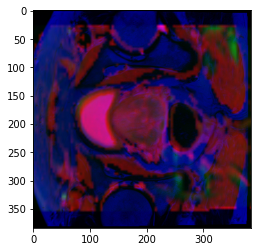

In [23]:
plt.imshow(x_train[654,:,:,:])

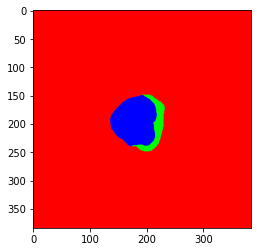

In [24]:
plt.imshow(y_train[654,:,:,:3])